# Scipy (partie 2)

URL : https://youtu.be/P0Xr5TIML8U?si=yqJJFxLsOMsp6A2-

## Traitement du signal

In [5]:
#importations
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
from scipy import ndimage

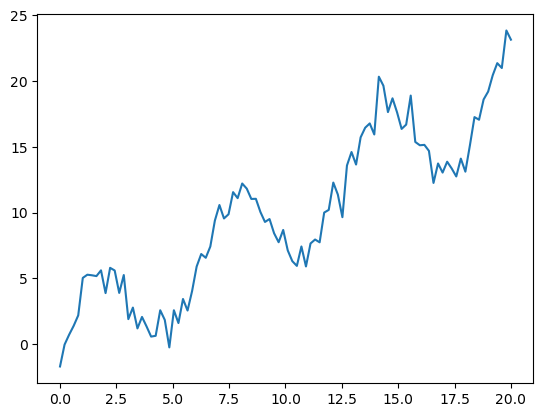

In [6]:
#définir x
#créer un tableau numpy composé de 100 valeurs allant de 0 à 20 uniformément espacés
x = np.linspace(0, 20, 100)

#définir y
#np.random.randn(): cette partie produit un tableau de nombres aléatoires d'une distribution normale
#x.shape[0] obtient le nombre de lignes dans le tableau x
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])

#tracer le graphique y en fonction de x
plt.plot(x,y)

- **detrend()** est une fonction qui **élimine toute tendance linéaire** dans un signal.

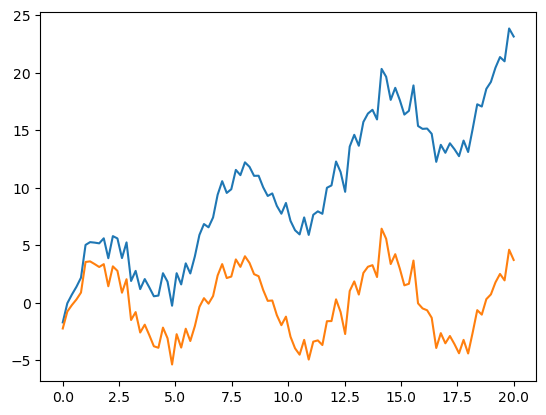

In [8]:
#éliminer la tendance linéaire dans y
#enregistrer sous la variable eppelée new_y
new_y = signal.detrend(y)

#tracer le graphique y en fonction de x
plt.plot(x,y)

#tracer le graphique new_y en fonction de x
plt.plot(x,new_y)

In [9]:
#en bleu est le signal original
#en orange est le signal avec la tendance linéaire supprimée

## La transformation de Fourier

Elle analyse les fréquences présentes dans un signal périodique. On obtient comme **résultat: un spectre (qui définit les amplitudes de chaque fréquence dans le signal otiginal)**.

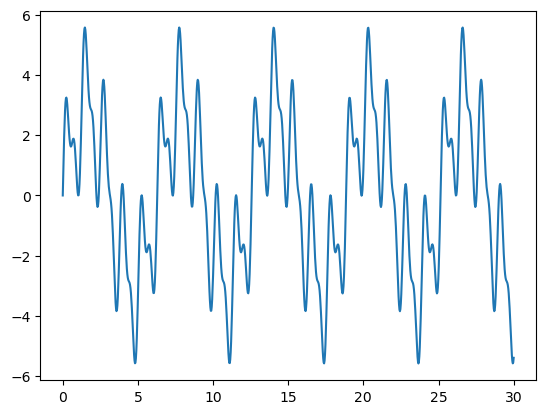

In [12]:
#définir x
#créer un tableau numpy composé de 1000 valeurs allant de 0 à 30 uniformément espacés
x = np.linspace(0, 30, 1000)

#définir y
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)

#tracer le graphique y en fonction de x
plt.plot(x,y)

C:\Users\HP\anaconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\HP\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


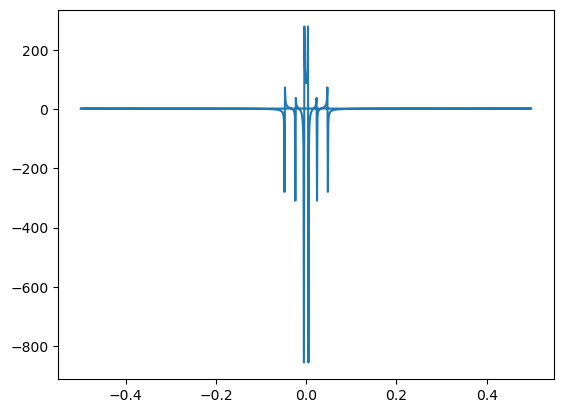

In [13]:
#définir fourier
fourier = fftpack.fft(y)

#définir frequences
#y.size: le nombre d'éléments de y
frequences = fftpack.fftfreq(y.size)

#tracer le graphique fourier en fonction de frequences
plt.plot(frequences, fourier)

In [14]:
#quand on voit ça, ça veut dire qu'il y a des fréquences négatives et des amplitudes négatives dans le spectre
#pour filtrer on crée une valeur absolue de fourier et une valeur absolue de frequences

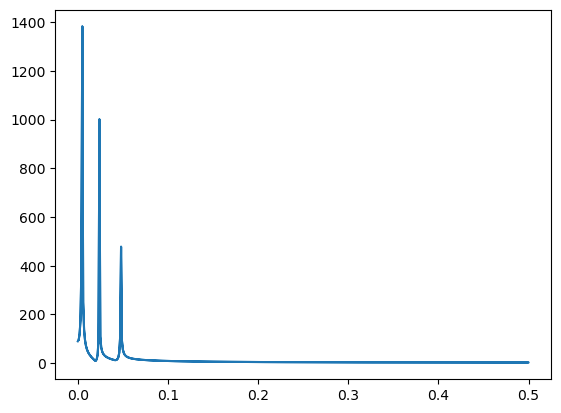

In [15]:
#définir fourier_abs
fourier_abs = np.abs(fourier)

#définir frequences_abs
frequences_abs = np.abs(frequences)

#tracer le graphique fourier_abs en fonction de frequences_abs
plt.plot(frequences_abs, fourier_abs)

In [16]:
#c'est bon!
#dans ce spectre on observe 3 pics qui correspondent aux 3 fréquences dans le signal original

### filtrer un signal avec la transformation de Fourier

Si par exemple on a un signal qui est perdu dans du bruit, alors on peut utiliser la transformation de Fourier pour filtrer ce signal, en 3 étapes:
1. Faire la transformation de Fourier pour produire le spectre du signal.
2. Utiliser le boolean indexing pour éliminer, dans le spectre, toutes les valeurs qui sont inférieures à un certain seuil, resultat: un spectre nettoyé.
3. Prendre ce spectre et utiliser la transformation de Fourier inverse pour repasser au monde réel et avoir au final un resultat un signal parfaitement propre.

**Application:**

1. Faire la transformation de Fourier pour produire le spectre du signal.

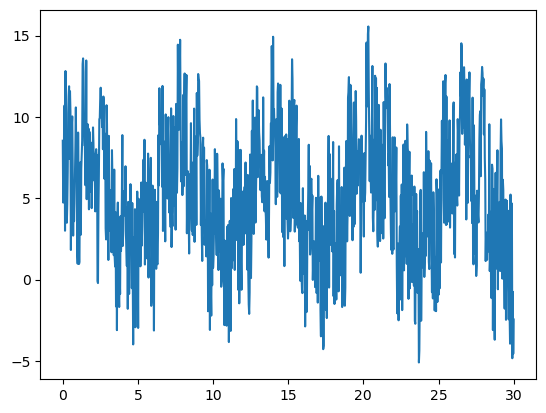

In [19]:
#définir x
#créer un tableau numpy composé de 1000 valeurs allant de 0 à 30 uniformément espacés
x = np.linspace(0, 30, 1000)

#définir y (contenant du bruit)
#np.random.random(): cette partie produit un tableau de nombres aléatoires
#x.shape[0] obtient le nombre de lignes dans le tableau x
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10

#tracer le graphique y en fonction de x
plt.plot(x,y)

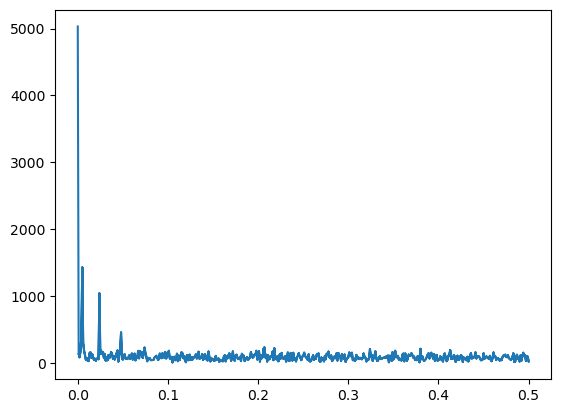

In [20]:
#définir fourier
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives

#définir frequences
#y.size: le nombre d'éléments de y
frequences = fftpack.fftfreq(y.size)

#tracer le graphique power en fonction de np.abs(frequences)
plt.plot(np.abs(frequences), power)

In [21]:
#pour filtrer on crée une valeur absolue de fourier et une valeur absolue de frequences

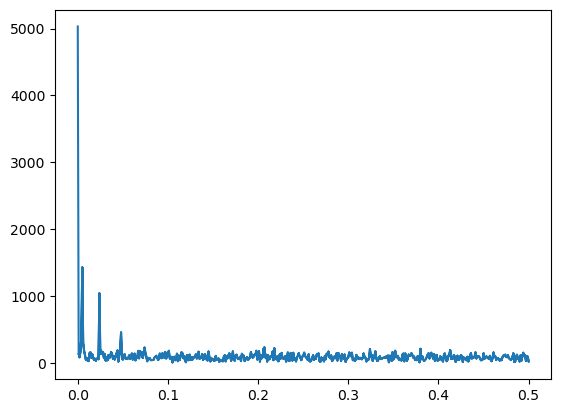

In [22]:
#définir fourier_abs
fourier_abs = np.abs(fourier)

#définir frequences_abs
frequences_abs = np.abs(frequences)

#tracer le graphique fourier_abs en fonction de frequences_abs
plt.plot(frequences_abs, fourier_abs)

In [23]:
#on voit qu'on a pas mal de bruit dans le spectre
#il faut alors le filtrer!

2. Utiliser le boolean indexing pour éliminer, dans le spectre, toutes les valeurs qui sont inférieures à un certain seuil, resultat: un spectre nettoyé.

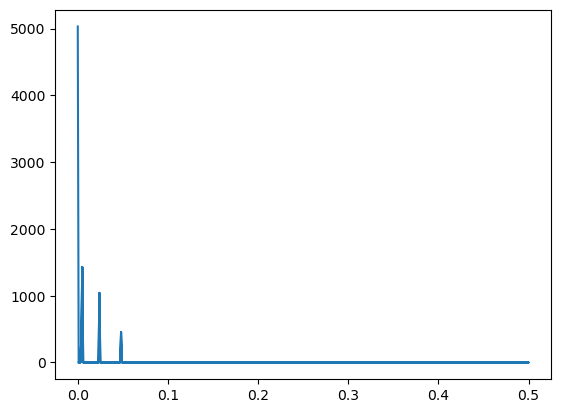

In [25]:
#filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

#visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [26]:
#le spectre est nettoyé!

3. Prendre ce spectre et utiliser la transformation de Fourier inverse pour repasser au monde réel et avoir au final un resultat un signal parfaitement propre.

- **Transformation de Fourier inverse:**

La formule: **signal = fftpack.ifft(fourier)**

**ifft:** signifie transformation de Fourier inverse

In [28]:
#appliquer la transformation de Fourier inverse fftpack.ifft() sur fourier
#enregistrer le résultat dans une variable appelée siltered_signal
filtered_signal = fftpack.ifft(fourier)

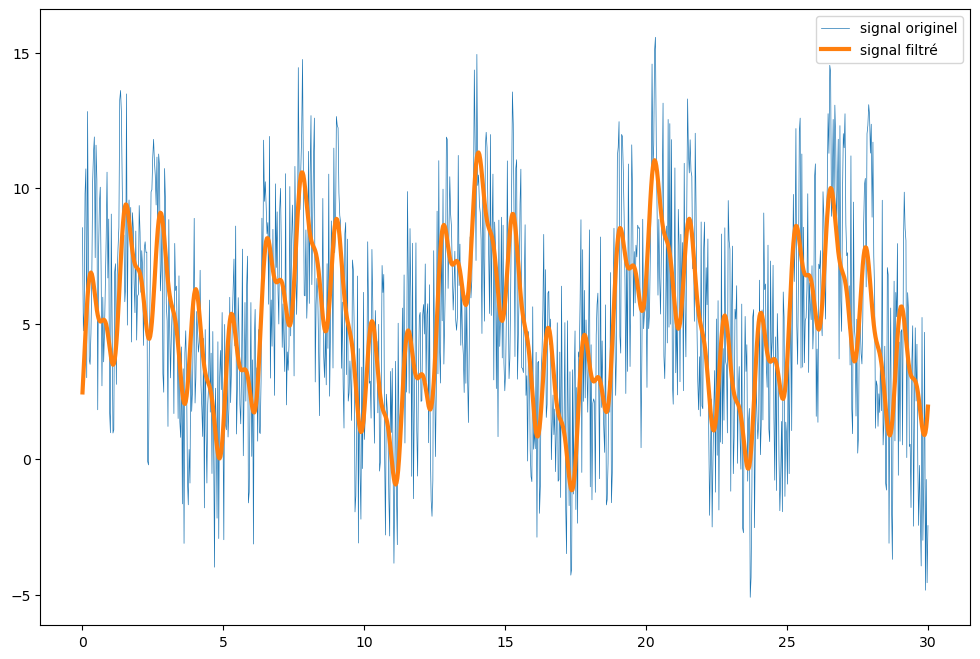

In [29]:
#créer une figure vide de dimensions personalisées
plt.figure(figsize=(12,8))

#tracer y en fonction de x
#avec une épaisseur de ligne lw=0.5
#légender: 'signal originel'
plt.plot(x, y, lw=0.5, label='signal originel')

#tracer y en fonction de x
#avec une épaisseur de ligne lw=3
#légender: 'signal filtré'
plt.plot(x, filtered_signal, lw=3, label='signal filtré')

#ajouter une légende
plt.legend()

In [30]:
#en bleu: le signal original (rempli de bruit)
#en orange: le (même) signal filtré

## Traitement d'image (image processing)

La morphologie est une technique mathématique qui permet de transformer des matrices (et donc des images).

Le principe est simple: on définit une structure, qui ressemble souvent à une croix, et cette structure va se déplacer de pixel en pixel sur toute l'image. Lorsqu'elle rencontre un pixel blanc, la structure va faire une des ces deux opération:
- imprimer autour d'elle des pixels blancs selon son motif : **la dilation**.
- effacer autour d'elle des pixels blancs : **l'érosion**.

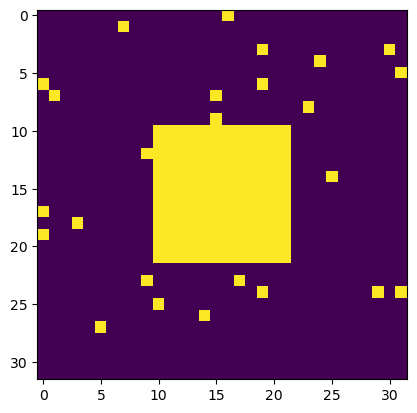

In [33]:
#fixer la graine du générateur de nombres aléatoires pour la reproductibilité
#en faisant celà, on obtiendra toujours les mêmes nombres aléatoires (à chaque exécution de ce code)
np.random.seed(0)  

#définir X
#créer une matrice 32x32 remplie de zéros  
X = np.zeros((32, 32))  

#remplir une zone centrale de la matrice avec des 1  
#X[10:-10, 10:-10] remplit tout sauf les 10 pixels les plus extérieurs  
X[10:-10, 10:-10] = 1  

#remplir aléatoirement 30 positions de la matrice avec des 1  
#np.random.randint génère des indices aléatoires  
# Les deux générateurs aléatoires sont utilisés pour les lignes et les colonnes  
random_rows = np.random.randint(0, 32, 30)  # 30 indices de rangées aléatoires  
random_cols = np.random.randint(0, 32, 30)  # 30 indices de colonnes aléatoires  
X[random_rows, random_cols] = 1  # Mettre à jour les positions aléatoires avec 1  

#afficher l'image de la matrice X 
plt.imshow(X)

In [34]:
'''
- Modification de la matrice

X[10:-10, 10:-10] = 1 remplace les éléments de la matrice dans un carré central par des 1,
laissant une bordure de 10 pixels de zéros tout autour.

- Ajout de valeurs aléatoires:

Des indices aléatoires pour les lignes et les colonnes sont générés.
Cela est fait à l'aide de np.random.randint(0, 32, 30), qui génère 30 indices compris entre 0 et 31.
Ces indices sont ensuite utilisés pour assigner des valeurs de 1 à des positions aléatoires dans la matrice.
'''

"\n- Modification de la matrice\n\nX[10:-10, 10:-10] = 1 remplace les éléments de la matrice dans un carré central par des 1,\nlaissant une bordure de 10 pixels de zéros tout autour.\n\n- Ajout de valeurs aléatoires:\n\nDes indices aléatoires pour les lignes et les colonnes sont générés.\nCela est fait à l'aide de np.random.randint(0, 32, 30), qui génère 30 indices compris entre 0 et 31.\nCes indices sont ensuite utilisés pour assigner des valeurs de 1 à des positions aléatoires dans la matrice.\n"

On essaye de supprimer les petits artéfacts dans l'image.

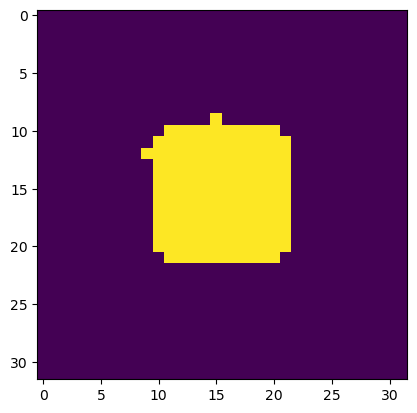

In [36]:
#binary_opening() combine l'érosion avec la dilation
#on l'applique sur X et on enregistre le resultat dans une variable appelée open_x
open_x = ndimage.binary_opening(X)

#afficher l'image de la matrice open_x 
plt.imshow(open_x)

In [37]:
#les artéfacts sont supprimés! (on a aussi les coins qui sont disparus...)

(398, 455)

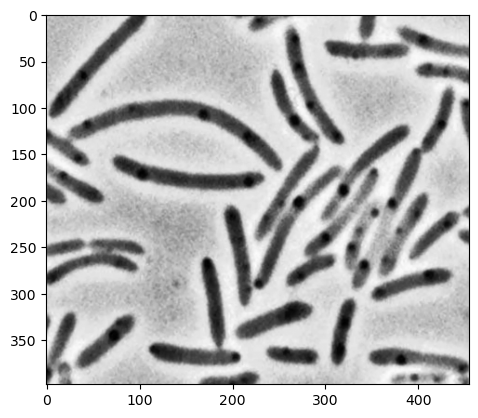

In [38]:
#importer l'image avec pyplot
image = plt.imread('bacteria.png')

#réduire l'image en 2D (en faisant du subsetting)
image = image[:,:,0]

#afficher l'image, avec une couleur grise (cmap='gray')
plt.imshow(image, cmap='gray')

#la forme de image
image.shape

Extraire les bactéries de l'arrière plan avec du boolean indexing.

(array([1.000e+00, 1.900e+01, 4.400e+01, 7.500e+01, 0.000e+00, 9.400e+01,
        1.210e+02, 1.080e+02, 0.000e+00, 1.000e+02, 9.000e+01, 1.170e+02,
        1.110e+02, 0.000e+00, 9.800e+01, 1.100e+02, 9.200e+01, 0.000e+00,
        1.030e+02, 1.040e+02, 1.210e+02, 0.000e+00, 9.800e+01, 1.090e+02,
        1.410e+02, 1.310e+02, 0.000e+00, 1.430e+02, 1.640e+02, 2.130e+02,
        0.000e+00, 2.370e+02, 2.510e+02, 2.620e+02, 2.670e+02, 0.000e+00,
        2.500e+02, 3.300e+02, 3.180e+02, 0.000e+00, 3.550e+02, 3.810e+02,
        3.710e+02, 0.000e+00, 4.290e+02, 4.150e+02, 4.070e+02, 4.350e+02,
        0.000e+00, 5.620e+02, 4.580e+02, 5.570e+02, 0.000e+00, 5.670e+02,
        6.180e+02, 6.970e+02, 6.690e+02, 0.000e+00, 6.800e+02, 7.260e+02,
        7.950e+02, 0.000e+00, 7.730e+02, 8.220e+02, 8.720e+02, 0.000e+00,
        9.140e+02, 9.580e+02, 8.320e+02, 8.530e+02, 0.000e+00, 8.670e+02,
        9.130e+02, 8.220e+02, 0.000e+00, 7.790e+02, 7.220e+02, 6.860e+02,
        6.420e+02, 0.000e+00, 6.100e+0

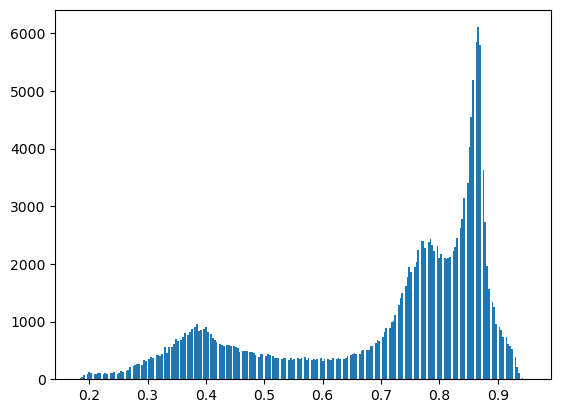

In [40]:
#créer une copie de l'image
image_2 = np.copy(image)

#applatir la copie: image_2.ravel()
#créer d'un histogramme avec bins=255
#pcq'en image, les pixels peuvent prebdre 255 valeurs en général
plt.hist(image_2.ravel(), bins=255)

In [41]:
#on peut clairement distinguer 3 groupes:
#on a de gauche à droite: un groupe sombre, un groupe gris clair puis le groupe blanc
#regarder l'image pour vérifier

In [42]:
#boolean indexing
#filtrer tout ce qui est inférieur à 0.6
image<0.6  #on obtient un masque

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

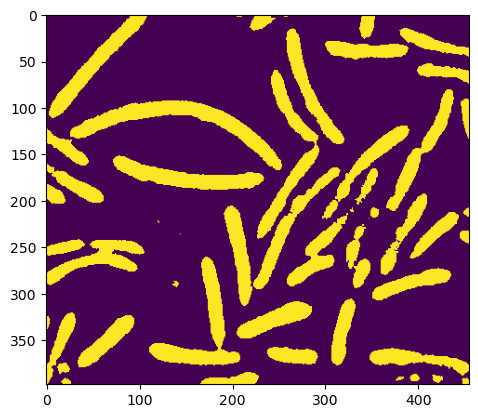

In [43]:
#boolean indexing: utiliser le masque pour la création d'une image binaire
image = image<0.6

#afficher image avec imshow()
plt.imshow(image)

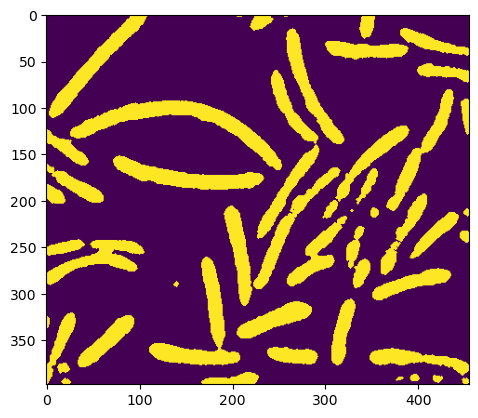

In [44]:
#morphologie utilisée pour enlever les artefacts
#binary_opening() combine l'érosion avec la dilation
#on l'applique sur image et on enregistre le resultat dans une variable appelée open_image
open_image = ndimage.binary_opening(image)

#afficher open_image avec imshow()
plt.imshow(open_image)

In [45]:
#ségmenter open_image
#ndimage.label() retourne 2 variables:
#label_image qui est une image qui contient les différentes étiquettes (sur chaque bactérie qu'on peut voir)
#n_labels est le nombre de ces étiquettes (qui sont placées sur l'image)
label_image, n_labels = ndimage.label(open_image)

#afficher n_labels
print(n_labels)

52


In [46]:
print(f'il y a {n_labels} groupes')

il y a 52 groupes


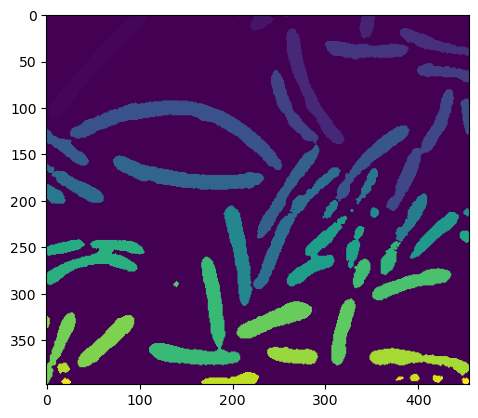

In [47]:
#visualiser l'image étiquetée label_image
plt.imshow(label_image)

### ndimage.sum()

Elle permet de mesurer la taille de chaque groupes de label_image, en faisant la somme des pixels.

Sa formule: **ndimage.sum(image, label, range())**

**range()** est le nombre d'étiquettes qu'on veut examiner.

In [51]:
#mesurer de la taille de chaque groupe de label_image avec ndimage.sum()
#faire la somme des pixels
sizes = ndimage.sum(open_image, label_image, range(n_labels))

#afficher sizes
sizes

array([   0., 2234.,   20.,  303.,   14.,  343., 1824.,  873., 1244.,
        646., 1123., 1851.,  250., 3868., 1381.,  659., 1393., 2570.,
        864., 1846.,  327.,  307.,  673.,  177., 1564.,   79.,   38.,
          8.,  819., 1464.,  429.,  108.,  449., 1895.,  419., 2897.,
        397., 1240.,   25., 1019., 1470.,  819., 1229.,   42.,  777.,
       1360.,  114.,  513.,   66.,   70.,   26.,   50.])

In [52]:
#la forme de sizes
sizes.shape

(52,)

Text(0, 0.5, 'taille relative')

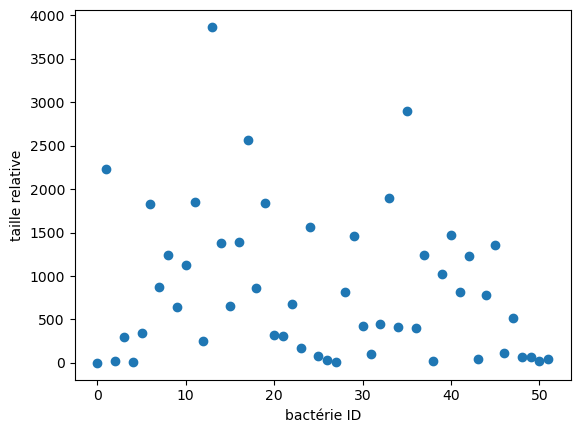

In [53]:
#visualiser les résultats
#nuage de points sizes en fonction de range(n_labels)
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')       #axe des x
plt.ylabel('taille relative')   #axe des y

In [54]:
#ça montre les tailles des différentes bactéries sur l'image
#et à partir de celà on a obtenu un dataset!